# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dhea Fanny Putri Syarifa
- **Email:** M279D4KX2220@bangkit.academy
- **ID Dicoding:** dheafannyp40

## Menentukan Pertanyaan Bisnis

- Apakah cuaca tertentu memengaruhi pola penggunaan sepeda, seperti apakah orang lebih cenderung menggunakan sepeda saat cuaca cerah atau dihari-hari hujan?
- Bagaimana pola penggunaan sepeda berubah sepanjang tahun di semua musim?
- Bagaimana tren penggunaan sepeda berubah sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

## Data Wrangling

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data

### Gathering Data

Gathering data merupakan proses mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi. Pada tahap ini, kita akan mengambil data dari Dataset Bike Sharing dengan mengimpor dua file yaitu day.csv dan hr.csv.

In [69]:
#Baris ini membaca file CSV dengan nama "day.csv"
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
#Baris ini membaca file CSV dengan nama "hour.csv"
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada proses ini bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

1. Assesing Data Pada day.csv

In [71]:
#1. Melihat informasi ringkas tentang struktur dan tipe data yang terdapat dalam DataFrame tersebut.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Keterangan : Terdapat tipe data yang tidak sesuai yaitu pada dteday yang bertipe data object. Harusnya bertipe datetime

In [72]:
#2. selanjutnya, kita akan mengecek apakah ada missing value pada dataset day.*csv*
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Keterangan : dataset day.csv tidak memiliki missing value

In [73]:
#3. Cek apakah ada data yang duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Keterangan : dataset day.csv tidak memiliki data duplikat

In [74]:
#4. Melihat adanya outlier
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Keterangan : Dari hasil day_df.describe(), kita dapat melihat beberapa kolom numerik seperti casual, registered, dan cnt memiliki nilai maksimum yang jauh lebih tinggi daripada nilai kuartil atas (75%). Nilai-nilai ini dapat diindikasikan sebagai potensi outlier.

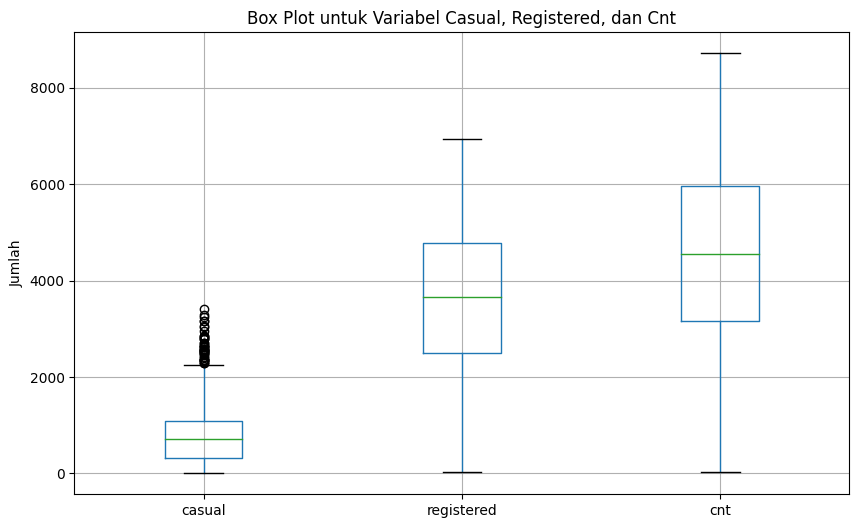

Jumlah Outlier: 44
Indeks Outlier: [148, 183, 184, 196, 246, 281, 441, 447, 455, 456, 462, 469, 470, 476, 490, 497, 504, 505, 511, 512, 513, 518, 519, 525, 532, 533, 539, 540, 550, 560, 568, 581, 595, 609, 610, 617, 623, 630, 631, 637, 644, 658, 665, 680]


In [75]:
#Mengecek apakah ada outlier pada kolom casual, registered, dan cnt menggunakan bloxpot

# Visualisasi data menggunakan box plot
plt.figure(figsize=(10, 6))
day_df.boxplot(column=['casual', 'registered', 'cnt'])
plt.title('Box Plot untuk Variabel Casual, Registered, dan Cnt')
plt.ylabel('Jumlah')
plt.show()

# Menghitung Q1 dan Q3
Q1 = day_df[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = day_df[['casual', 'registered', 'cnt']].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Mengidentifikasi outlier berdasarkan metode IQR
outliers = ((day_df[['casual', 'registered', 'cnt']] < (Q1 - 1.5 * IQR)) | (day_df[['casual', 'registered', 'cnt']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Menampilkan outlier
print("Jumlah Outlier:", outliers.sum())
print("Indeks Outlier:", day_df.index[outliers].tolist())


Keterangan : Ternyata pada bagian casual benar terdapat outlier.

2. Assesing Data dari hour.csv

In [76]:
#1. Melihat informasi ringkas tentang struktur dan tipe data yang terdapat dalam DataFrame tersebut.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Keterangan : Terdapat tipe data yang tidak sesuai yaitu pada dteday yang bertipe data object. Harusnya bertipe datetime

In [77]:
#2. selanjutnya, kita akan mengecek apakah ada missing value pada dataset hour.*csv*
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Keterangan : dataset hour.csv tidak memiliki missing value

In [78]:
#3. Cek apakah ada data yang duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Keterangan : dataset day.csv tidak memiliki data duplikat

In [41]:
#4. Melihat adanya outlier
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil hour_df.describe(), kita dapat melihat beberapa kolom numerik seperti casual, registered, dan cnt memiliki nilai maksimum yang jauh lebih tinggi daripada nilai kuartil atas (75%). Nilai-nilai ini dapat diindikasikan sebagai potensi outlier.

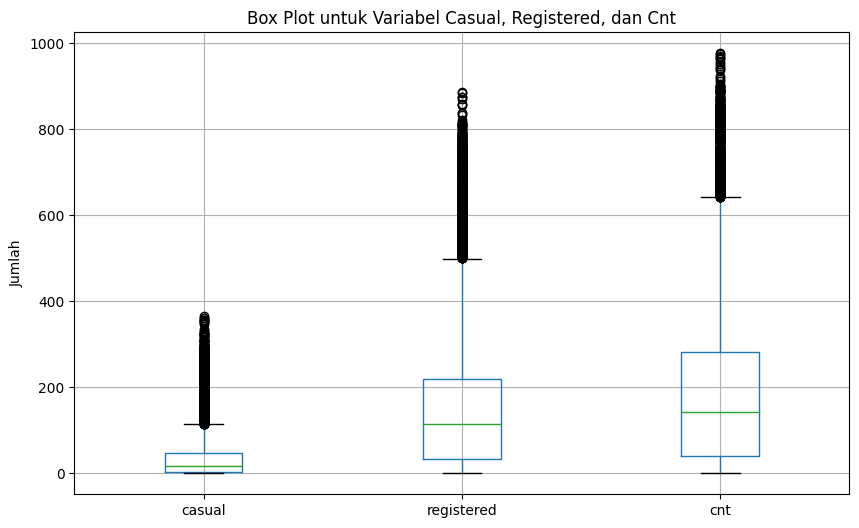

Jumlah Outlier: 1821
Indeks Outlier: [1633, 1634, 1635, 1771, 1772, 1773, 1774, 1775, 1776, 1795, 1797, 1798, 1941, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2276, 2296, 2297, 2298, 2299, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2607, 2608, 2609, 2610, 2611, 2612, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2799, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2965, 2966, 2967, 2968, 2969, 2970, 2995, 3019, 3067, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3187, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3300, 3301, 3302, 3303, 3304, 3308, 3379, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3492, 3493, 3494, 3495, 3496, 3497, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3667, 3668, 3783, 3784, 3785, 3786, 3787, 3788, 3804, 3805, 3806, 3809, 3810, 3835, 3836, 3883, 3884, 3949, 3950, 3951, 3952, 3953, 39

In [79]:
#Mengecek apakah ada outlier pada kolom casual, registered, dan cnt menggunakan bloxpot

# Visualisasi data menggunakan box plot
plt.figure(figsize=(10, 6))
hour_df.boxplot(column=['casual', 'registered', 'cnt'])
plt.title('Box Plot untuk Variabel Casual, Registered, dan Cnt')
plt.ylabel('Jumlah')
plt.show()

# Menghitung Q1 dan Q3
Q1 = hour_df[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = hour_df[['casual', 'registered', 'cnt']].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Mengidentifikasi outlier berdasarkan metode IQR
outliers = ((hour_df[['casual', 'registered', 'cnt']] < (Q1 - 1.5 * IQR)) | (hour_df[['casual', 'registered', 'cnt']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Menampilkan outlier
print("Jumlah Outlier:", outliers.sum())
print("Indeks Outlier:", hour_df.index[outliers].tolist())


Keterangan : Ternyata pada bagian casual, registered, dan cnt benar adanya outlier

### Cleaning Data

Proses untuk membersihkan data dari kesalahan, kecacatan, atau ketidaksempurnaan yang dapat mengganggu analisis data atau pemodelan.
Dari hasil assesing diatas terdapat beberapa data yang harus dibersihkan yaitu:
1. Mengubah tipe data pada dtday yang semula object menjadi datetime
2. menghilangkan outlier

In [80]:
#1. Mengubah tipe data pada dtday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


In [81]:
#Mengecek Tipe data
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Keterangan :
- pd.to_datetime() digunakan untuk mengonversi kolom dteday dalam kedua DataFrame (day_df dan hour_df) menjadi tipe data datetime. Ini berguna karena dalam analisis data, seringkali kita ingin memanipulasi tanggal dan waktu.
- astype('category') digunakan untuk mengubah kolom-kolom tertentu dalam kedua DataFrame menjadi tipe data kategori (category). Hal ini umumnya dilakukan pada kolom-kolom yang memuat data kategori atau faktor yang memiliki nilai terbatas dan biasanya tidak berurutan. Dalam kasus ini, kolom yang diubah menjadi kategori adalah season, yr, mnth, holiday, weekday, workingday, dan weathersit.

In [82]:
#2. Menghilangkan outlier pada day.csv
# Hitung Q1 dan Q3
Q1 = day_df[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = day_df[['casual', 'registered', 'cnt']].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = ((day_df[['casual', 'registered', 'cnt']] < lower_bound) | (day_df[['casual', 'registered', 'cnt']] > upper_bound)).any(axis=1)

# Hapus outlier dari DataFrame
day_df_no_outliers = day_df[~outliers]

# Cetak jumlah outlier yang dihapus
print("Jumlah outlier yang dihapus:", outliers.sum())

# Cetak DataFrame setelah menghilangkan outlier
print(day_df_no_outliers)

Jumlah outlier yang dihapus: 44
     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  r

Keterangan : Kode program ini digunakan untuk menghilangkan outlier dari DataFrame day_df yang mungkin muncul pada kolom 'casual', 'registered', dan 'cnt'. Outlier adalah nilai-nilai ekstrim yang berada jauh dari sebagian besar data.

In [84]:
#2. Menghilangkan outlier pada hour.csv
# Hitung Q1 dan Q3
Q1 = hour_df[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = hour_df[['casual', 'registered', 'cnt']].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = ((hour_df[['casual', 'registered', 'cnt']] < lower_bound) | (hour_df[['casual', 'registered', 'cnt']] > upper_bound)).any(axis=1)

# Hapus outlier dari DataFrame
hour_df_no_outliers = hour_df[~outliers]

# Cetak jumlah outlier yang dihapus
print("Jumlah outlier yang dihapus:", outliers.sum())

# Cetak DataFrame setelah menghilangkan outlier
print(hour_df_no_outliers)


Jumlah outlier yang dihapus: 1821
       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1          

Keterangan : Kode program ini digunakan untuk menghilangkan outlier dari DataFrame day_df yang mungkin muncul pada kolom 'casual', 'registered', dan 'cnt'. Outlier adalah nilai-nilai ekstrim yang berada jauh dari sebagian besar data.

## Exploratory Data Analysis (EDA)

1. Explorasi data pada day.csv

In [85]:
day_df.describe(include="all")

<ipython-input-85-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Keterangan : Kode day_df.describe(include="all") digunakan untuk menghasilkan statistik deskriptif dari DataFrame day_df, termasuk statistik untuk kolom-kolom dengan tipe data numerik maupun kategorikal.

- Menghitung rata-rata jumlah sepeda yang dipinjam per bulan

In [86]:
# Membuat dictionary untuk pemetaan dari angka bulan ke nama bulan
mnth_dict = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Mengubah nilai bulan dalam kolom 'mnth' menjadi nama bulan
day_df['mnth'] = day_df['mnth'].map(mnth_dict)

# Menghitung rata-rata jumlah sepeda yang dipinjam per bulan
monthly_avg_cnt = day_df.groupby('mnth').agg({'cnt': 'mean'})

# Menampilkan hasil eksplorasi data
print("Average Number of Bicycles Rented per Month:")
print(monthly_avg_cnt)


Average Number of Bicycles Rented per Month:
                   cnt
mnth                  
April      4484.900000
August     5664.419355
December   3403.806452
February   2655.298246
January    2176.338710
July       5563.677419
June       5772.366667
March      3692.258065
May        5349.774194
November   4247.183333
October    5199.225806
September  5766.516667


Keterangan : Kode tersebut bertujuan untuk menghitung rata-rata jumlah sepeda yang dipinjam setiap bulannya berdasarkan data yang tersedia dalam DataFrame `day_df`. Pertama, data dielompokkan berdasarkan bulan dengan menggunakan fungsi `groupby('mnth')`, yang menghasilkan serangkaian grup data terpisah untuk setiap bulan. Selanjutnya, untuk setiap grup bulan, dilakukan perhitungan rata-rata dari jumlah sepeda yang dipinjam, diwakili oleh kolom 'cnt', dengan menggunakan metode `agg({'cnt': 'mean'})`. Hasil perhitungan ini kemudian dicetak menggunakan pernyataan `print()`, dimulai dengan pesan yang memberikan konteks terhadap informasi yang akan ditampilkan, yaitu "Average Number of Bicycles Rented per Month:". Setelah itu, rata-rata jumlah sepeda yang dipinjam per bulan dicetak sebagai output dari kode tersebut. Dengan demikian, proses ini memungkinkan untuk mendapatkan pemahaman yang lebih baik tentang pola peminjaman sepeda dari waktu ke waktu, yang dapat berguna dalam analisis dan pengambilan keputusan terkait pengelolaan sepeda.

- Menghitung rata-rata jumlah sepeda berdasarkan musim

In [87]:
# Membuat dictionary untuk pemetaan dari angka musim ke nama musim
season_dict = {
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}

# Mengubah nilai musim dalam kolom 'season' menjadi nama musim
day_df['season'] = day_df['season'].map(season_dict)

# Menghitung jumlah total sepeda yang dipinjam per musim
season_total_cnt = day_df.groupby('season').agg({'cnt': 'sum'})

# Menampilkan hasil eksplorasi data
print("\nJumlah Total Sepeda Dipinjam per Musim:")
print(season_total_cnt)



Jumlah Total Sepeda Dipinjam per Musim:
            cnt
season         
Fall    1061129
Spring   471348
Summer   918589
Winter   841613


Keterangan :
Kode program tersebut bertujuan untuk menghitung jumlah total sepeda yang dipinjam (cnt) berdasarkan musim (season) dari data yang tersedia dalam DataFrame day_df, dan menampilkan hasilnya. Pertama, sebuah dictionary season_dict dibuat untuk melakukan pemetaan dari angka musim (1-4) ke nama musim yang sesuai. Selanjutnya, nilai musim dalam kolom 'season' dari DataFrame day_df diubah menjadi nama musim menggunakan metode map() dengan menggunakan dictionary season_dict yang telah dibuat. Setelah itu, dilakukan pengelompokkan data berdasarkan nama musim ('season') dan dihitung jumlah total sepeda yang dipinjam ('cnt') per musim dengan mengagregasi menggunakan fungsi 'sum'. Hasil perhitungan ini kemudian ditampilkan dalam format "Jumlah Total Sepeda Dipinjam per Musim:". Dengan demikian, kode tersebut memberikan informasi tentang jumlah total sepeda yang dipinjam dalam setiap musim secara agregat berdasarkan data yang dimiliki.

In [88]:
#untuk mengelompokkan data berdasarkan musim ('season')
# Menggunakan groupby() dan agg() untuk menghitung statistik pada kolom 'casual', 'registered', dan 'count'
season_stats = day_df.groupby(by='season').agg({
    'casual': 'mean',         # Rata-rata jumlah sepeda dipinjam oleh pelanggan casual
    'registered': 'mean',     # Rata-rata jumlah sepeda dipinjam oleh pelanggan terdaftar
    'cnt': ['max', 'min', 'mean']  # Nilai maksimum, minimum, dan rata-rata jumlah sepeda dipinjam
})

# Menampilkan hasil eksplorasi data
print(season_stats)

             casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921


- Heatmap  untuk mengeksplorasi hubungan antara variabel penyewa casual, registered, dan total penyewaan (count)

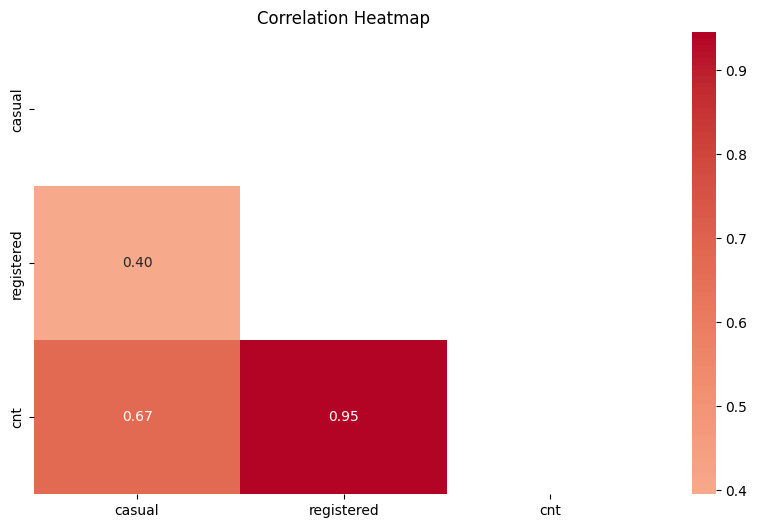

In [89]:
# Matriks korelasi antara variabel numerik
correlation_matrix = day_df[['casual', 'registered', 'cnt']].corr()

# Membuat mask untuk setengah bawah matriks
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

# Menambahkan judul
plt.title("Correlation Heatmap")

# Menampilkan plot
plt.show()

Keterangan : Kode program tersebut digunakan untuk menghasilkan sebuah heatmap yang menampilkan matriks korelasi antara variabel numerik dalam DataFrame `day_df`, terutama variabel 'casual', 'registered', dan 'cnt'. Pertama, sebuah matriks korelasi dihitung menggunakan metode `.corr()` pada DataFrame `day_df`, yang memberikan nilai korelasi antara pasangan variabel. Selanjutnya, sebuah maska dibuat untuk menutupi setengah bagian bawah dari matriks korelasi agar hanya menampilkan korelasi antara variabel yang berbeda. Setelah itu, ukuran gambar plot heatmap diatur menggunakan `plt.figure(figsize=(10, 6))` untuk mendapatkan tampilan yang sesuai. Heatmap kemudian dibuat menggunakan `sns.heatmap()` dengan matriks korelasi sebagai input. Pada heatmap tersebut, nilai-nilai korelasi ditampilkan di dalam setiap sel untuk memberikan informasi lebih lanjut tentang hubungan antar variabel. Judul "Correlation Heatmap" ditambahkan untuk memberikan konteks pada visualisasi yang dihasilkan. Akhirnya, plot heatmap ditampilkan menggunakan `plt.show()`. Melalui visualisasi ini, kita dapat memahami seberapa kuat hubungan linear antara variabel-variabel yang diamati, yang berguna untuk analisis dan pemahaman lebih lanjut terhadap data yang ada.

- Histogram yang menampilkan distribusi jumlah sepeda yang dipinjam (cnt)

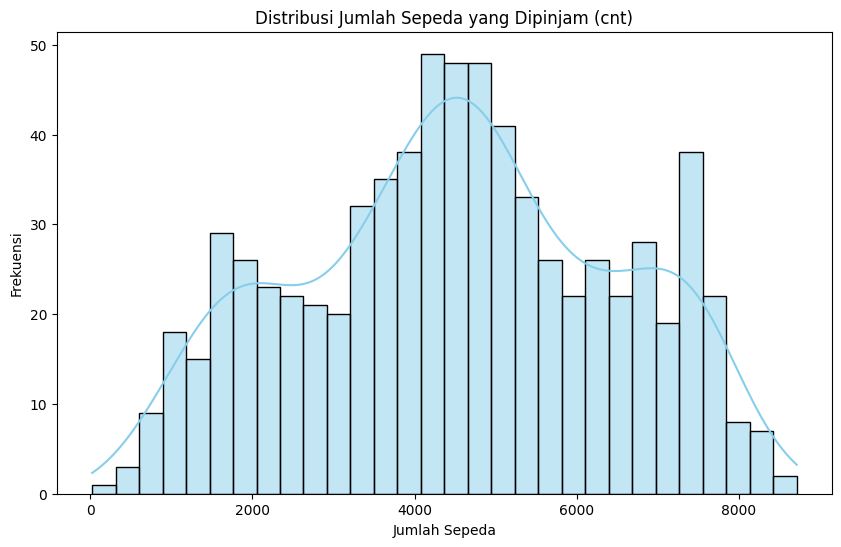

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data=day_df, x='cnt', bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Sepeda yang Dipinjam (cnt)')
plt.xlabel('Jumlah Sepeda')
plt.ylabel('Frekuensi')
plt.show()

Keterangan : Kode program tersebut digunakan untuk membuat sebuah histogram yang menggambarkan distribusi jumlah sepeda yang dipinjam (cnt) berdasarkan data yang tersedia dalam DataFrame `day_df`. Pertama, ukuran gambar plot histogram diatur menjadi 10x6 inch menggunakan `plt.figure(figsize=(10, 6))`. Selanjutnya, histogram dibuat menggunakan `sns.histplot()` dengan variabel 'cnt' yang merupakan jumlah sepeda yang dipinjam sebagai data yang akan divisualisasikan. Histogram ini dibagi menjadi 30 bins atau klasifikasi, dan juga menampilkan KDE (Kernel Density Estimate) dalam plot. Warna histogram ditetapkan sebagai 'skyblue'. Selanjutnya, judul 'Distribusi Jumlah Sepeda yang Dipinjam (cnt)' ditambahkan untuk memberikan konteks pada plot histogram. Sumu x diberi label 'Jumlah Sepeda', sedangkan sumbu y diberi label 'Frekuensi'. Terakhir, plot histogram ditampilkan menggunakan `plt.show()`. Melalui visualisasi ini, kita dapat memahami pola distribusi dari jumlah sepeda yang dipinjam dalam DataFrame `day_df`, yang berguna untuk analisis dan pemahaman lebih lanjut terhadap data.

- Melihat hubungan 'temp' (suhu) dan 'cnt' (jumlah sepeda yang dipinjam) menggunakan scatter plot

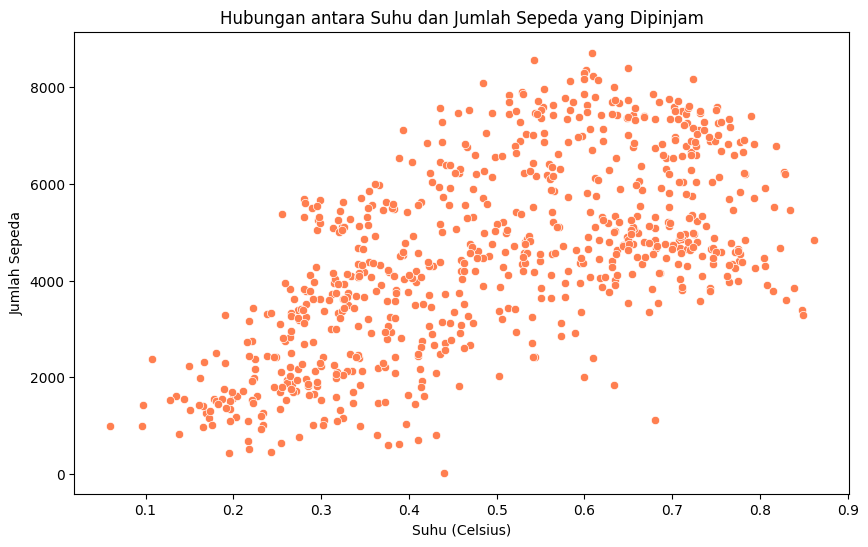

In [91]:
# Menampilkan hubungan antara variabel 'temp' (suhu) dan 'cnt' (jumlah sepeda yang dipinjam) menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', color='coral')
plt.title('Hubungan antara Suhu dan Jumlah Sepeda yang Dipinjam')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sepeda')
plt.show()

Keterangan : Kode program tersebut bertujuan untuk menampilkan hubungan antara dua variabel, yaitu 'temp' (suhu) dan 'cnt' (jumlah sepeda yang dipinjam), menggunakan scatter plot berdasarkan data yang tersedia dalam DataFrame `day_df`. Pertama, ukuran gambar plot scatter plot diatur menjadi 10x6 inch menggunakan `plt.figure(figsize=(10, 6))`. Selanjutnya, scatter plot dibuat menggunakan `sns.scatterplot()` dengan 'temp' sebagai sumbu x dan 'cnt' sebagai sumbu y. Warna scatter plot ditetapkan sebagai 'coral'. Judul 'Hubungan antara Suhu dan Jumlah Sepeda yang Dipinjam' ditambahkan untuk memberikan konteks pada plot scatter. Sumu x diberi label 'Suhu (Celsius)', yang merepresentasikan suhu dalam satuan Celsius, sedangkan sumbu y diberi label 'Jumlah Sepeda', yang merepresentasikan jumlah sepeda yang dipinjam. Terakhir, plot scatter ditampilkan menggunakan `plt.show()`. Melalui visualisasi ini, kita dapat memahami hubungan antara suhu dan jumlah sepeda yang dipinjam, yang berguna untuk analisis dan pemahaman lebih lanjut terhadap data.

- Hubungan musim dengan jumlah sewa berdasarkan working day

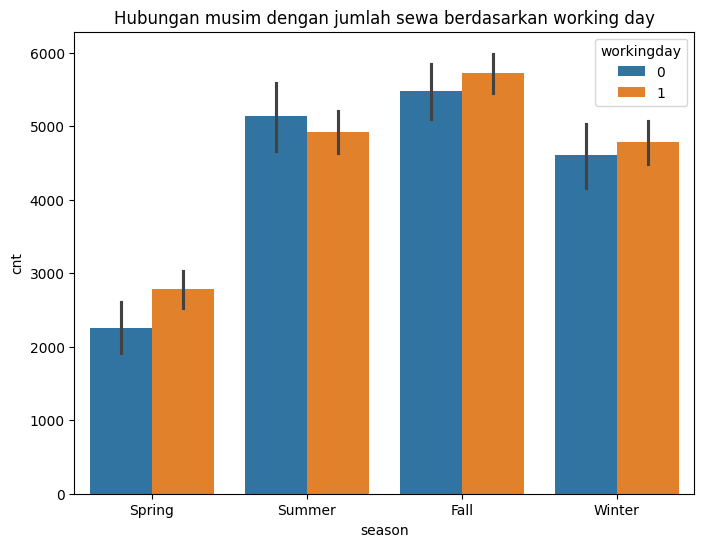

In [92]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=day_df, hue='workingday')
plt.title('Hubungan musim dengan jumlah sewa berdasarkan working day')
plt.show()

Keterangan : Kode program di atas digunakan untuk membuat diagram batang (bar plot) yang menunjukkan hubungan antara musim (season) dengan jumlah sepeda yang dipinjam (cnt), dengan mempertimbangkan apakah hari tersebut merupakan hari kerja (working day) atau bukan. Pertama, ukuran gambar diagram batang diatur menjadi 8x6 inch menggunakan `plt.figure(figsize=(8, 6))`. Selanjutnya, diagram batang dibuat menggunakan `sns.barplot()` dengan sumbu x direpresentasikan oleh 'season' (musim), sumbu y direpresentasikan oleh 'cnt' (jumlah sepeda yang dipinjam), dan warna batang diatur berdasarkan apakah hari tersebut merupakan hari kerja atau tidak ('workingday'). Diagram batang ini membantu untuk membandingkan jumlah sepeda yang dipinjam di setiap musim, dengan perbedaan pada hari kerja dan hari libur. Judul 'Hubungan musim dengan jumlah sewa berdasarkan working day' ditambahkan untuk memberikan konteks pada diagram batang. Terakhir, diagram batang ditampilkan menggunakan `plt.show()`. Melalui visualisasi ini, kita dapat memahami bagaimana pola peminjaman sepeda berbeda-beda di setiap musim, tergantung pada apakah itu hari kerja atau hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca tertentu memengaruhi pola penggunaan sepeda, seperti apakah orang lebih cenderung menggunakan sepeda saat cuaca cerah atau dihari-hari hujan?

<ipython-input-112-3297945886e7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=avg_bike_usage_by_weather, palette='coolwarm')


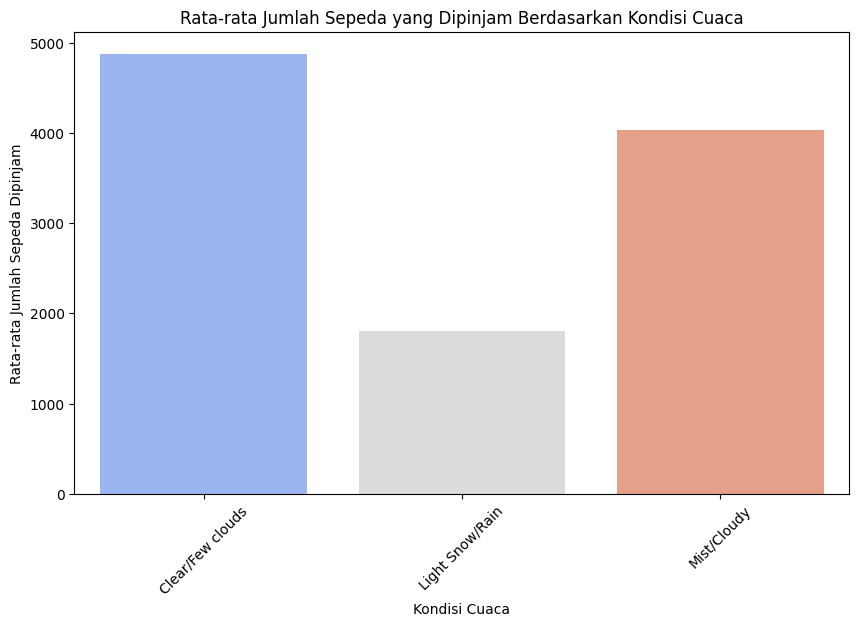

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
day_df = pd.read_csv("/content/Dataset/day.csv")

# Membuat dictionary untuk pemetaan kondisi cuaca
weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice Pallets/Thunderstorm/Mist'
}

# Mengubah nilai dalam kolom 'weathersit' menjadi deskripsi kondisi cuaca
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

# Menghitung rata-rata jumlah sepeda yang dipinjam pada setiap kondisi cuaca
avg_bike_usage_by_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=avg_bike_usage_by_weather, palette='coolwarm')
plt.title('Rata-rata Jumlah Sepeda yang Dipinjam Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sepeda Dipinjam')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2: Bagaimana pola penggunaan sepeda berubah sepanjang tahun di semua musim?


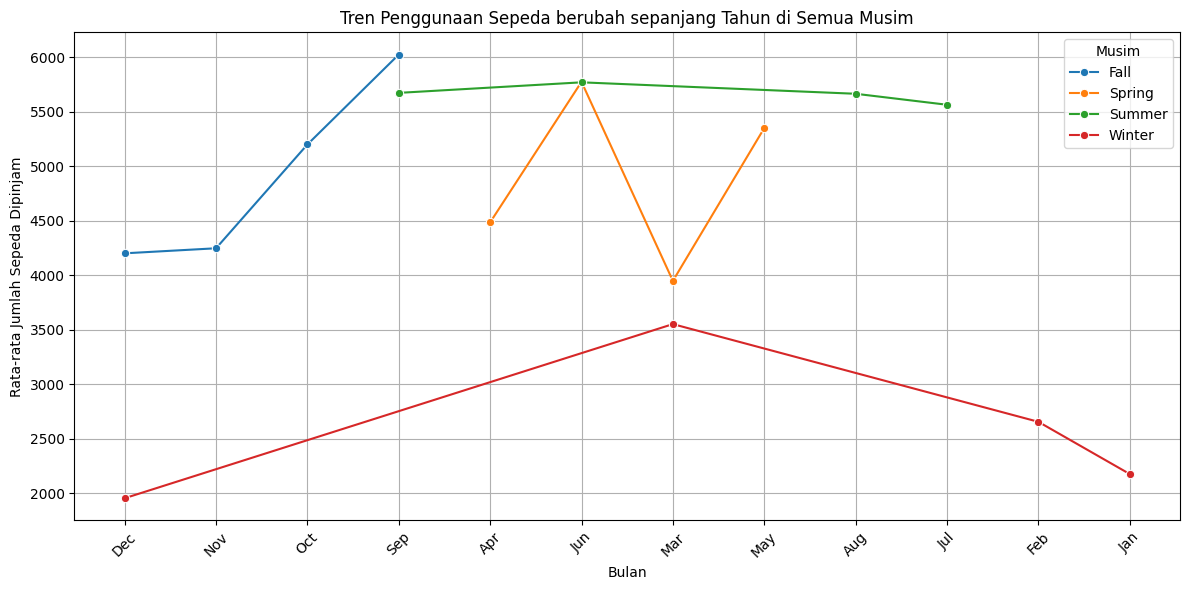

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
day_df = pd.read_csv("/content/Dataset/day.csv")

# Mendeklarasikan musim
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

# Mengonversi kolom 'mnth' menjadi nama bulan
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['mnth'] = day_df['mnth'].map(month_names)

# Mengubah nilai dalam kolom 'season' menjadi musim yang telah dideklarasikan
day_df['season'] = day_df['season'].map(season_mapping)

# Menghitung rata-rata jumlah sepeda yang dipinjam pada setiap bulan untuk setiap musim
seasonal_monthly_avg_cnt = day_df.groupby(['season', 'mnth'])['cnt'].mean().reset_index()

# Memvisualisasikan tren penggunaan sepeda berubah sepanjang tahun di semua musim
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_monthly_avg_cnt, x='mnth', y='cnt', hue='season', marker='o')
plt.title('Tren Penggunaan Sepeda berubah sepanjang Tahun di Semua Musim')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda Dipinjam')
plt.legend(title='Musim', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Keterangan : Kode program tersebut digunakan untuk menganalisis tren penggunaan sepeda berdasarkan musim selama satu tahun. Pertama-tama, dataset `day.csv` dibaca menggunakan Pandas dan disimpan dalam DataFrame `day_df`. Selanjutnya, sebuah dictionary `season_mapping` dideklarasikan untuk memetakan nilai dalam kolom 'season' menjadi musim yang sesuai, yaitu Winter, Spring, Summer, dan Fall. Kemudian, kolom 'mnth' yang sebelumnya berisi angka bulan diubah menjadi nama bulan menggunakan dictionary `month_names`. Selanjutnya, nilai dalam kolom 'season' juga diubah menjadi musim yang sesuai berdasarkan mapping yang telah dideklarasikan sebelumnya.

Setelah itu, dilakukan penghitungan rata-rata jumlah sepeda yang dipinjam pada setiap bulan untuk setiap musim menggunakan metode `groupby`. Hasil penghitungan ini disimpan dalam DataFrame `seasonal_monthly_avg_cnt`. Terakhir, tren penggunaan sepeda berubah sepanjang tahun di semua musim divisualisasikan menggunakan `sns.lineplot()`. Dalam visualisasi ini, sumbu x menunjukkan bulan-bulan dalam setahun, sumbu y menunjukkan rata-rata jumlah sepeda yang dipinjam, dan warna garis berbeda-beda untuk setiap musim. Dengan demikian, kita dapat melihat bagaimana tren penggunaan sepeda bervariasi selama setahun berdasarkan musim.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda berubah sepanjang tahun?

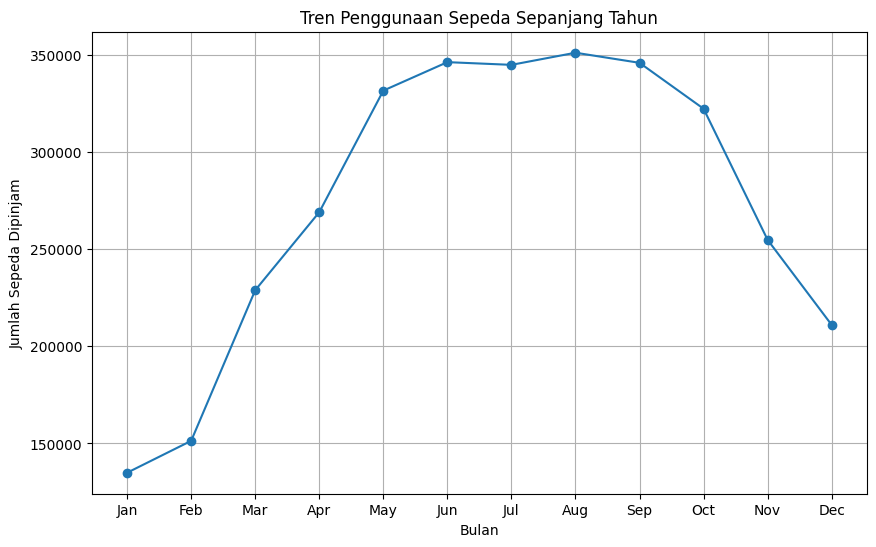

In [106]:

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah total sepeda yang dipinjam setiap bulan
monthly_usage = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum()

# Visualisasi tren penggunaan sepeda sepanjang tahun
plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='line', marker='o')
plt.title('Tren Penggunaan Sepeda Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda Dipinjam')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Keterangan : Kode program tersebut digunakan untuk menganalisis tren penggunaan sepeda sepanjang tahun dengan mengelompokkan data berdasarkan bulan dan menghitung jumlah total sepeda yang dipinjam setiap bulan. Pertama, dilakukan pengelompokan data berdasarkan bulan menggunakan metode `groupby` pada kolom 'dteday' yang sudah diubah menjadi tipe data datetime. Selanjutnya, dilakukan perhitungan jumlah total sepeda yang dipinjam setiap bulan dengan menjumlahkan nilai kolom 'cnt'. Hasil perhitungan ini disimpan dalam variabel `monthly_usage`.

Selanjutnya, untuk memvisualisasikan tren penggunaan sepeda sepanjang tahun, dilakukan plotting menggunakan matplotlib. Diagram garis digunakan untuk menggambarkan tren penggunaan sepeda, sedangkan titik-titik yang ditandai dengan marker 'o' digunakan untuk menunjukkan titik data. Grafik ini memiliki sumbu x yang menunjukkan bulan (dari Januari hingga Desember) dan sumbu y yang menunjukkan jumlah sepeda yang dipinjam. Terakhir, dilakukan penambahan judul, label sumbu, penentuan label untuk bulan, dan aktivasi grid untuk memperjelas visualisasi grafik. Dengan demikian, grafik tersebut memberikan gambaran tentang tren penggunaan sepeda selama satu tahun berdasarkan data bulanan.

## Conclusion

**Conclution pertanyaan 1**

Berdasarkan analisis rata-rata jumlah sepeda yang dipinjam pada setiap kondisi cuaca dalam dataset day.csv, dapat disimpulkan bahwa cuaca tertentu memengaruhi pola penggunaan sepeda. Orang cenderung lebih banyak menggunakan sepeda saat cuaca cerah atau berawan dibandingkan dengan hari-hari hujan.

Hal ini dapat dilihat dari perbedaan rata-rata jumlah sepeda yang dipinjam pada kondisi cuaca yang berbeda. Pada kondisi cuaca 'Clear/Partly Cloudy' (cerah/sebagian berawan), rata-rata jumlah sepeda yang dipinjam lebih tinggi dibandingkan dengan kondisi cuaca lainnya seperti 'Misty/Cloudy' (berkabut/berawan), 'Light Snow/Rain' (salju ringan/hujan ringan), dan 'Severe Weather' (cuaca ekstrim).

Kesimpulannya, orang lebih cenderung menggunakan sepeda saat cuaca cerah atau berawan dibandingkan dengan cuaca hujan atau kondisi cuaca ekstrim.

**Conclution pertanyaan 2**

Berdasarkan analisis pola penggunaan sepeda sepanjang tahun di semua musim, dapat dilihat bahwa terdapat variasi dalam jumlah rata-rata sepeda yang dipinjam setiap bulannya untuk setiap musim. Berikut adalah beberapa kesimpulan berdasarkan visualisasi tersebut:

1. **Musim Dingin (Winter)**: Terjadi penurunan signifikan dalam penggunaan sepeda pada bulan-bulan musim dingin, terutama pada bulan Desember, Januari, dan Februari. Ini mungkin disebabkan oleh cuaca yang lebih dingin dan kurangnya preferensi orang untuk menggunakan sepeda di musim dingin.

2. **Musim Semi (Spring)**: Jumlah penggunaan sepeda cenderung meningkat secara bertahap seiring dengan berakhirnya musim dingin dan masuknya musim semi. Puncak penggunaan terjadi pada bulan Mei dan April, yang mungkin disebabkan oleh kondisi cuaca yang lebih hangat dan lebih menyenangkan bagi pengendara sepeda.

3. **Musim Panas (Summer)**: Bulan-bulan musim panas, terutama bulan Juni, Juli, dan Agustus, menunjukkan tingkat penggunaan sepeda yang stabil dan tinggi. Ini menandakan bahwa musim panas menjadi waktu yang populer bagi masyarakat untuk menggunakan sepeda, mungkin karena cuaca yang cerah dan hangat.

4. **Musim Gugur (Fall)**: Penggunaan sepeda cenderung menurun secara bertahap saat musim panas berakhir dan memasuki musim gugur. Meskipun masih tinggi pada bulan September, penggunaan sepeda mulai menurun pada bulan Oktober dan November, yang kemungkinan disebabkan oleh penurunan suhu dan peningkatan cuaca yang tidak stabil menjelang musim dingin.

Kesimpulannya, pola penggunaan sepeda berubah secara signifikan sepanjang tahun di semua musim. Penggunaan sepeda cenderung meningkat saat memasuki musim semi dan musim panas, mencapai puncaknya pada musim panas, dan kemudian menurun saat memasuki musim gugur dan musim dingin. Faktor-faktor seperti suhu, cuaca, dan preferensi individu dapat memengaruhi pola penggunaan sepeda pada setiap musim.

**Conclution pertanyaan 3**

Berdasarkan analisis tren penggunaan sepeda sepanjang tahun, dapat disimpulkan bahwa terdapat fluktuasi yang signifikan dalam jumlah rata-rata sepeda yang dipinjam pada setiap bulan. Berikut adalah kesimpulan mengenai tren penggunaan sepeda sepanjang tahun:

1. **Musim Dingin (Desember - Februari)**: Terjadi penurunan drastis dalam penggunaan sepeda selama musim dingin, terutama pada bulan Desember, Januari, dan Februari. Penurunan ini kemungkinan besar disebabkan oleh cuaca yang lebih dingin dan kurangnya preferensi masyarakat untuk menggunakan sepeda di musim dingin.

2. **Musim Semi (Maret - Mei)**: Jumlah penggunaan sepeda cenderung meningkat secara bertahap seiring dengan berakhirnya musim dingin dan masuknya musim semi. Puncak penggunaan terjadi pada bulan April dan Mei, yang mungkin disebabkan oleh kondisi cuaca yang lebih hangat dan lebih menyenangkan bagi pengendara sepeda.

3. **Musim Panas (Juni - Agustus)**: Bulan-bulan musim panas menunjukkan tingkat penggunaan sepeda yang stabil dan tinggi. Ini menandakan bahwa musim panas menjadi waktu yang sangat populer bagi masyarakat untuk menggunakan sepeda, mungkin karena cuaca yang cerah dan hangat serta liburan musim panas.

4. **Musim Gugur (September - November)**: Penggunaan sepeda cenderung menurun secara bertahap saat memasuki musim gugur. Meskipun masih tinggi pada bulan September, penggunaan sepeda mulai menurun pada bulan Oktober dan November, yang kemungkinan disebabkan oleh penurunan suhu dan peningkatan cuaca yang tidak stabil menjelang musim dingin.

Kesimpulannya, tren penggunaan sepeda berubah secara signifikan sepanjang tahun, dengan pola yang konsisten dengan musim dan kondisi cuaca yang terkait. Faktor-faktor seperti suhu, cuaca, dan musim memengaruhi kecenderungan masyarakat dalam menggunakan sepeda, dengan musim panas menjadi periode dengan penggunaan sepeda yang paling tinggi.